<a href="https://colab.research.google.com/github/AlexeyTri/MLSeminars/blob/main/MLHSE/HW4/HW4_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import BisectingKMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from time import time
import scipy as sp
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

import plotly.express as px
from time import time

plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

%matplotlib inline
%config InlineBackend.figure_format="retina"

RANDOM_STATE = 42

# Download data

In [ ]:
!wget https://gist.githubusercontent.com/Yegorov/dc61c42aa4e89e139cd8248f59af6b3e/raw/20ac954e202fe6a038c2b4bb476703c02fe0df87/ya.py
!chmod +x ya.py
!./ya.py https://yadi.sk/d/_WFxgSIuBF06Rg /content/data_HW3

--2023-03-11 18:26:21--  https://gist.githubusercontent.com/Yegorov/dc61c42aa4e89e139cd8248f59af6b3e/raw/20ac954e202fe6a038c2b4bb476703c02fe0df87/ya.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 723 [text/plain]
Saving to: ‘ya.py.1’

ya.py.1             100%[===================>]     723  --.-KB/s    in 0s      

2023-03-11 18:26:21 (21.7 MB/s) - ‘ya.py.1’ saved [723/723]

--2023-03-11 18:26:23--  https://downloader.disk.yandex.ru/disk/77a0024211d5d895a84e6b3de0e7289b5065c0737d25a8d3c832ca850cb5fbf8/640d000f/9lLk8YuVilYISK3Fj34iz2f9JoJsdzo-im-cQLBSDIrufiv9DiG4XZgItUEWmo9Y-gpnKAyDLbo2T5uVrhY4sw%3D%3D?uid=0&filename=samsung_HAR.zip&disposition=attachment&hash=r49FYnOZfE1LoxwcXcBoJDLHu%2BKdZ0RDffB8NF31Z6SKMBCGT2N6A6EWbxxlc00Yq/J6bpmRyOJonT3VoXnDag%3D%3

In [ ]:
!unzip samsung_HAR.zip -d samsung_HAR

Archive:  samsung_HAR.zip
replace samsung_HAR/samsung_HAR/samsung_test_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: samsung_HAR/samsung_HAR/samsung_test_labels.txt  
replace samsung_HAR/__MACOSX/samsung_HAR/._samsung_test_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: samsung_HAR/__MACOSX/samsung_HAR/._samsung_test_labels.txt  
replace samsung_HAR/samsung_HAR/samsung_train_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: samsung_HAR/samsung_HAR/samsung_train_labels.txt  
replace samsung_HAR/__MACOSX/samsung_HAR/._samsung_train_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: samsung_HAR/__MACOSX/samsung_HAR/._samsung_train_labels.txt  
replace samsung_HAR/samsung_HAR/samsung_test.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: samsung_HAR/samsung_HAR/samsung_test.txt  
replace samsung_HAR/__MACOSX/samsung_HAR/._samsung_test.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: samsung_HAR/__MACOSX/samsu

# Task 1.0

In [ ]:
df_train = pd.read_fwf('/content/samsung_HAR/samsung_HAR/samsung_train.txt')

In [ ]:
df_test = pd.read_fwf('/content/samsung_HAR/samsung_HAR/samsung_test.txt')

In [ ]:
df_test = pd.DataFrame(data=df_test.values, columns=df_train.columns)

In [ ]:
X = pd.concat([df_train, df_test])

In [ ]:
df_test_labels = pd.read_fwf('/content/samsung_HAR/samsung_HAR/samsung_test_labels.txt')

In [ ]:
df_train_labels = pd.read_fwf('/content/samsung_HAR/samsung_HAR/samsung_train_labels.txt')

In [ ]:
y = pd.concat([df_train_labels, df_test_labels])

# Task 1.1

In [ ]:
# how type in dataset
X.dtypes.unique()

array([dtype('float64')], dtype=object)

In [ ]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [ ]:
X_scaler = pd.DataFrame(data=X_scaler, columns=X.columns)

# Task 1.2

In [ ]:
pca = PCA(n_components=0.9, svd_solver='full', random_state=RANDOM_STATE, )
X_pca = pca.fit_transform(X_scaler)

In [ ]:
X_pca.shape # 66 components explain our data

(10297, 66)

In [ ]:
X_pca = pd.DataFrame(data=X_pca, columns=pca.get_feature_names_out())

# Task 1.3

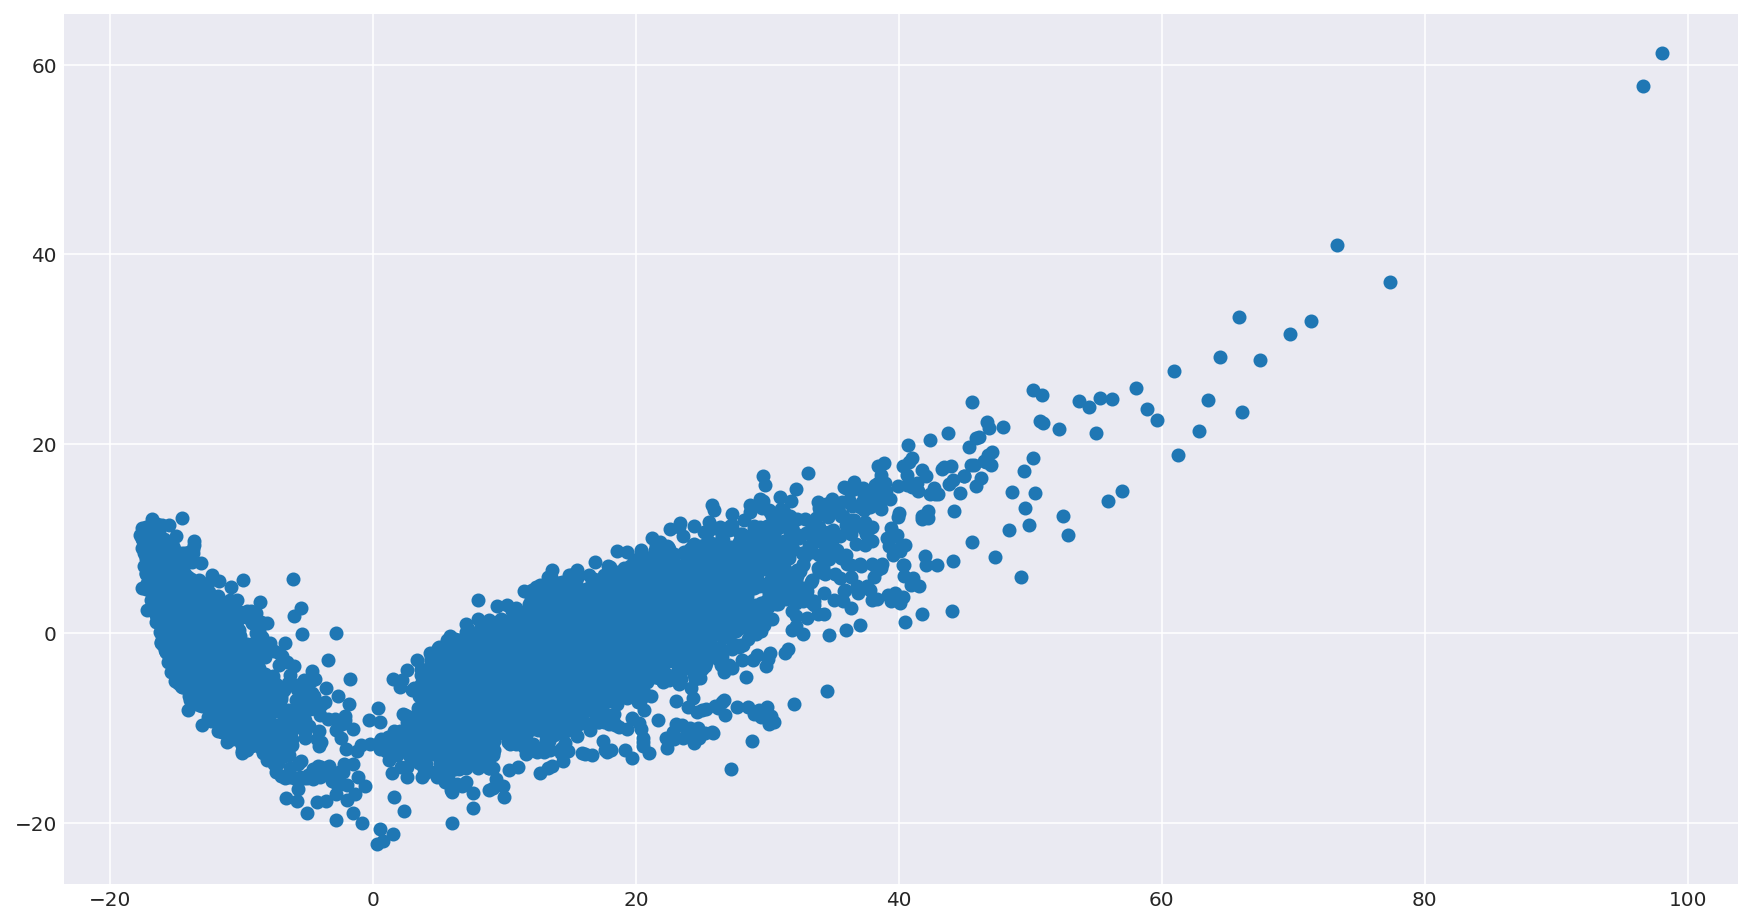

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X_pca['pca0'], X_pca['pca1'], cmap='virdis')
plt.show()

# Task 1.4

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=100, random_state = RANDOM_STATE)

In [ ]:
%%time
kmeans.fit(X_pca)

CPU times: user 30 s, sys: 6.9 s, total: 36.9 s
Wall time: 30 s


KMeans(n_clusters=6, n_init=100, random_state=42)

In [ ]:
pd.Series(kmeans.labels_).value_counts()

4    2621
2    2461
5    1934
3    1658
0    1342
1     281
dtype: int64

In [ ]:
X_pca['labels'] = kmeans.labels_

# Task 1.5

In [ ]:
pd_centrs = pd.DataFrame(kmeans.cluster_centers_)

In [ ]:
centr_clusters = pd_centrs.iloc[:, :3]

Text(0, 0.5, 'y')

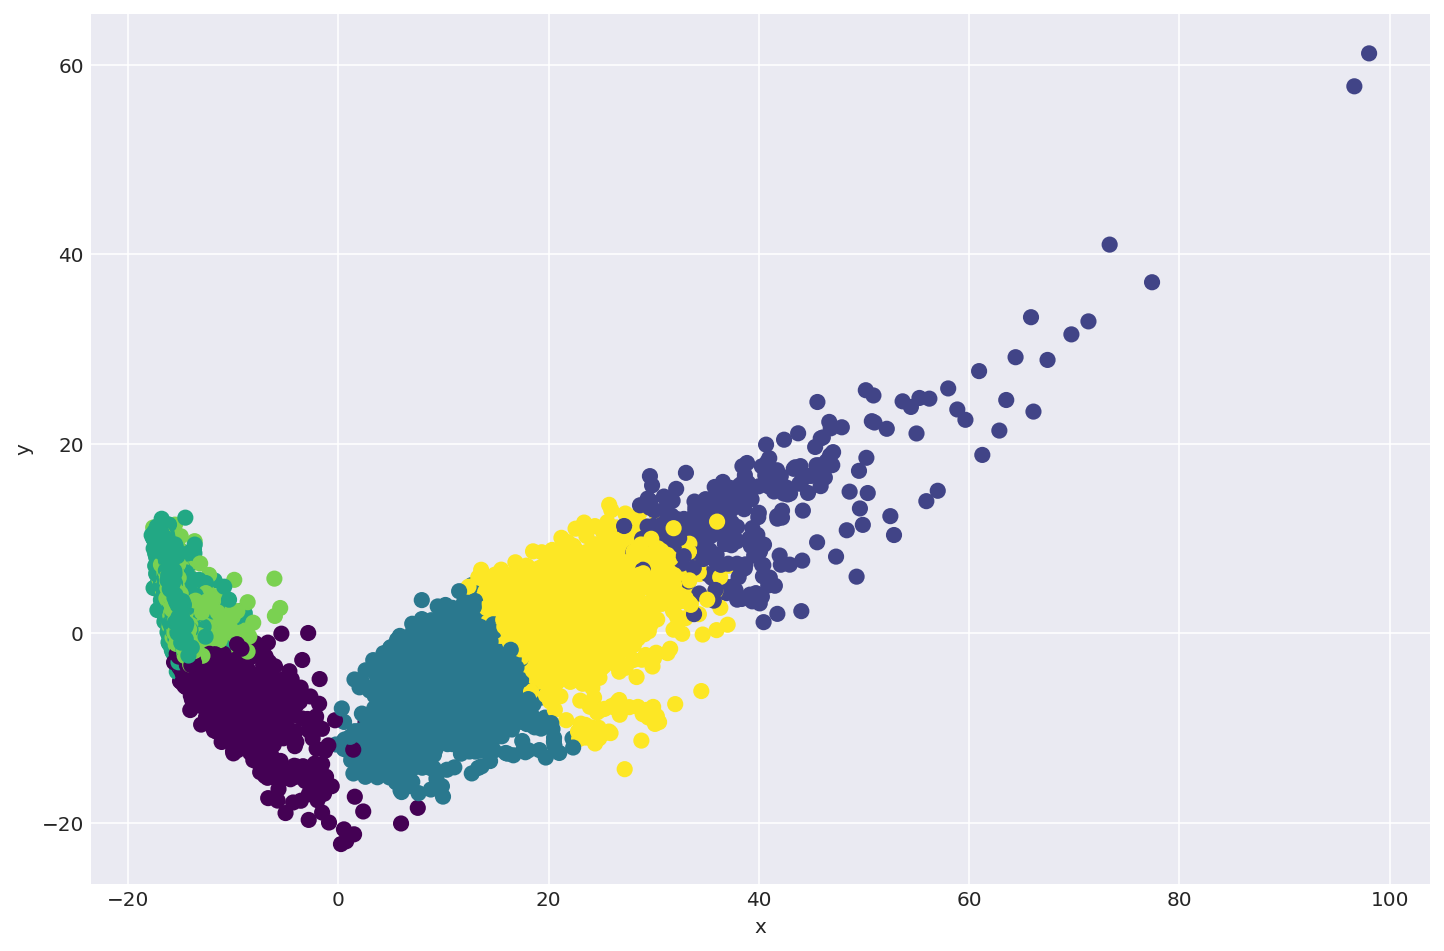

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca['pca0'], X_pca['pca1'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
# make 3d chart, better seen cluster 1 and 2
%%time
fig = px.scatter_3d(X_pca, x='pca0', y='pca1', z='pca2',color=X_pca['labels'], labels={'0': 'r', '1':2,'2':3,'3':9,'4':4,'5':5}).update_layout(width=600, title_text='Кластеризация данных с гироскопов',showlegend=False)
fig.add_scatter3d(x=centr_clusters[0], y=centr_clusters[1], z=centr_clusters[2],marker=dict(symbol='diamond'), marker_color='green')

fig.show()

CPU times: user 591 ms, sys: 117 ms, total: 708 ms
Wall time: 1.08 s


# Task 1.6

In [ ]:
# makesupport function. Code https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
def cluster(name, data, labels):
    t0 = time()
    if name == 'k-means++':
      estimator = KMeans(init='k-means++', n_clusters=6, n_init=100, random_state = RANDOM_STATE).fit(data)
      fit_time = time() - t0
      results = [name, fit_time, estimator.inertia_]
    elif name == 'AgglomerativeClustering':
      estimator = AgglomerativeClustering(n_clusters=6, ).fit(data)
      fit_time = time() - t0
      name = 'AggCl'
      results = [name, fit_time, estimator.n_leaves_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator.labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator.labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t\t\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [ ]:
print(100 * "_")
print("init\t\ttime\tuniq_param_estim\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
cluster(name='k-means++', data=X_pca, labels=X_pca['labels'])
cluster(name='AgglomerativeClustering', data=X_pca, labels=X_pca['labels'])
print(100 * "_")

____________________________________________________________________________________________________
init		time	uniq_param_estim	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	20.391s	2006714			1.000	1.000	1.000	1.000	1.000	0.132
AggCl    	7.658s	10297			0.764	0.735	0.749	0.670	0.749	0.099
____________________________________________________________________________________________________


# Task 1.7

In [ ]:
agl = AgglomerativeClustering(n_clusters=6, ).fit(X_pca)
pd.Series(agl.labels_).value_counts()

4    2742
2    2252
3    1820
5    1290
0    1130
1    1063
dtype: int64

In [ ]:
X_pca['labels_agl'] = agl.labels_

In [ ]:
%%time
px.scatter_3d(X_pca, x='pca0', y='pca1', z='pca2',color=X_pca['labels_agl'])

CPU times: user 67.6 ms, sys: 851 µs, total: 68.4 ms
Wall time: 70.9 ms


# Task 1.8

## DBSCAN

In [ ]:
%%time
clustering = DBSCAN(eps=1.5, min_samples=10).fit(X_pca.iloc[:, :3].values)

CPU times: user 166 ms, sys: 776 µs, total: 167 ms
Wall time: 174 ms


In [ ]:
pd.Series(clustering.labels_).value_counts()

 0    5399
 1    3770
-1    1100
 4      10
 3      10
 2       8
dtype: int64

In [ ]:
X_pca['DBSCAN_labels'] = clustering.labels_

In [ ]:
px.scatter_3d(X_pca, x='pca0', y='pca1', z='pca2',color=X_pca['DBSCAN_labels'])

### Вывод: работает быстрее kmens, результаты существенно хуже, парментры eps и min_samples, подбирались в ручную, до достижения необходимого количества классов.

# 2.0

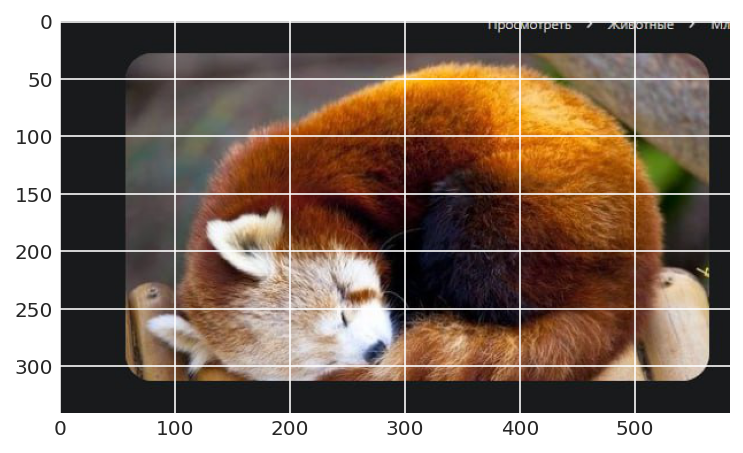

In [72]:
from PIL import Image
import numpy as np
im_owl = Image.open("/content/photo_2023-02-17_20-12-47.jpg")
np_owl = np.asarray(im_owl)
plt.imshow(np_owl)

#Task 2.1 + 2.2 - spectral_clustering не отработал

In [36]:
def crop_center(pil_img, crop_width: int, crop_height: int) -> Image:
    """
    Функция для обрезки изображения по центру.
    """
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

In [73]:
#  удалим лишнее
im_crop_owl = crop_center(im_owl,430, 290)
im_crop_owl.save('owl_crop.jpg', quality=95)

In [74]:
image_owl = Image.open("/content/owl_crop.jpg").convert('L')
image_owl = np.asarray(image_owl)

# функция для перевода в формат [x,y,r,g,b]
# img_owl_list = []
# for i in range(image_owl.shape[0]):
#   for j in range(image_owl.shape[1]):
#     img_owl_list.append([i, j, np.array(image_owl[i][j])])

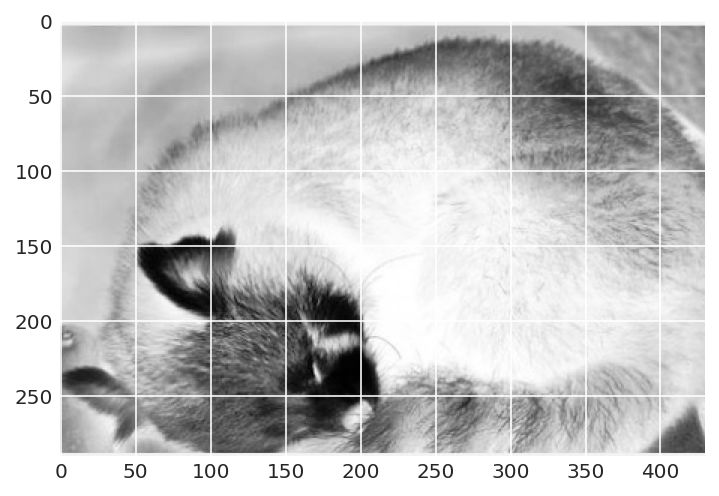

In [75]:
plt.imshow(image_owl)

In [76]:
!pip install pyamg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
image_owl_graph = image.img_to_graph(image_owl)

In [90]:
# сформируем матирцу расстояний между пикселями
image_owl_graph.data = np.exp(-5 * image_owl_graph.data / image_owl.std()) + 1e-6

In [91]:
labels_kmeans = spectral_clustering(image_owl_graph,eigen_solver='amg', n_clusters=6, assign_labels='kmeans', random_state=42)

In [92]:
labels_discretize = spectral_clustering(image_owl_graph,eigen_solver='amg', n_clusters=6, assign_labels='discretize', random_state=42)

! метод amg не устойчив, соответственно сохраним получившееся изображение

In [93]:
labels_kmeans = labels_kmeans.reshape(image_owl.shape)
labels_discretize = labels_discretize.reshape(image_owl.shape)

<ipython-input-94-0cd23ede3e99>:4: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(labels_discretize == l, contours=1, colors=[plt.cm.Spectral(l / float(6)), ])


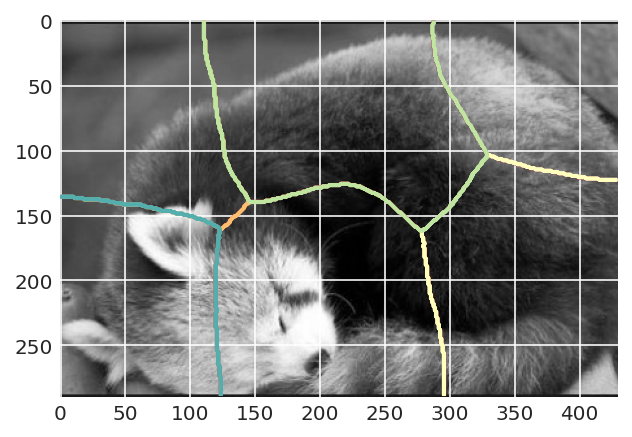

In [94]:
plt.figure(figsize=(5, 5))
plt.imshow(image_owl,   cmap=plt.cm.gray)
for l in range(6):
  plt.contour(labels_discretize == l, contours=1, colors=[plt.cm.Spectral(l / float(6)), ])
plt.show()

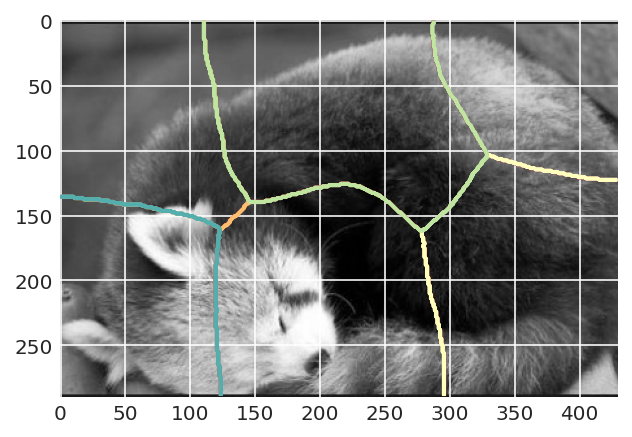

<ipython-input-95-7a861cc59a5d>:4: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(labels_kmeans == l, contours=1, colors=[plt.cm.Spectral(l / float(6)), ])


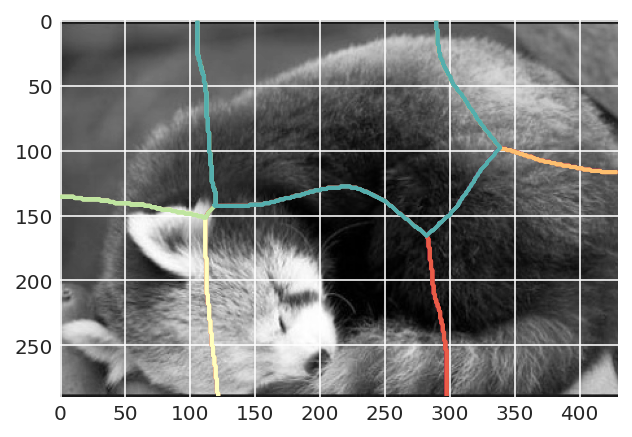

In [95]:
plt.figure(figsize=(5, 5))
plt.imshow(image_owl,   cmap=plt.cm.gray)
for l in range(6):
  plt.contour(labels_kmeans == l, contours=1, colors=[plt.cm.Spectral(l / float(6)), ])
plt.show()

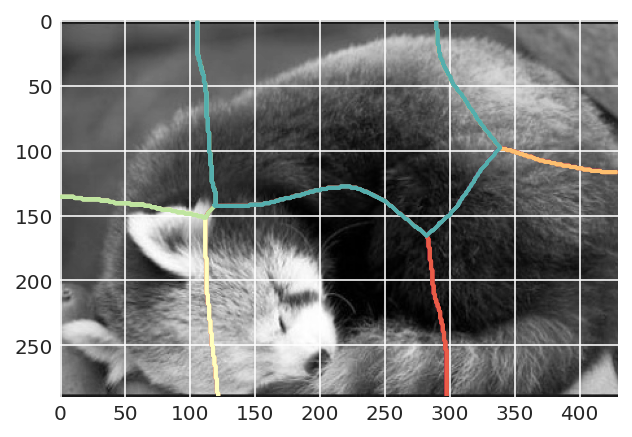